# Momentum Signal

Implementação do **Momentum Signal** presente no *paper* **Dissecting Investment Strategies in the Cross Section and Time Series** de Jamil Baz, Nick Granger, Campbell R. Harvey, Nicolas Le Roux e Sandy Rattray.

Bibliotecas necessárias: **NumPy** e **Pandas**. As demais bibliotecas foram utilizadas apenas para obter e visualizar os dados.

***

## Preparativos

In [45]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import yfinance as yf

%matplotlib inline

In [46]:
# Baixa a timeseries da AAPL
download = yf.download('AAPL')

[*********************100%***********************]  1 of 1 completed


In [47]:
# Visualização dos dados
download.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.405683,117258400
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.384517,43971200
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.356296,26432000
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.365115,21610400
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.375698,18362400


In [48]:
# Escolhe os preços de fechamento para implementação do modelo
data = download['Close']

In [49]:
# Quantidade de dados nulos
print(data.isna().sum())

0


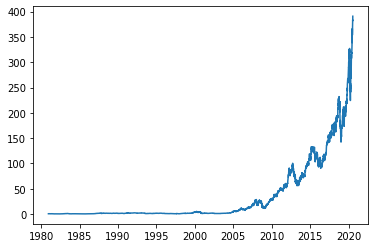

In [50]:
# Visualização da série
plt.plot(data)

***

## Funções

In [51]:
# Função lambda apresentada no paper
def lamb(n):
    return (n-1) / n

# Função meia-vida apresentada no paper
def HL(n):
    return np.log10(0.5) / np.log10(lamb(n))

# Função R apresentada no paper
def R(x):
    return (x * np.exp(-x**2/4)) / (0.89)

***

## Meia-vida

In [52]:
# Listas com valores de S_k e L_k dados no paper
S = [8., 16., 32.]
L = [24., 48., 96.]

In [53]:
# Listas que armazenarão as meias-vidas para cada valor anterior
S_half = []
L_half = []

# Calcula cada meia-vida
for k in range(len(S)):
    S_half.append(HL(S[k]))
    L_half.append(HL(L[k]))
    
# Visualização das meias-vidas    
print('S_half:', S_half)
print('L_half', L_half)

S_half: [5.1908930696844315, 10.740053666281314, 21.832302341719117]
L_half [16.28650047764122, 32.923274992978826, 66.19495089858204]


***

## Determinação do $x_k$

In [54]:
# Lista que armazenará cada x_k
X = []

# Calcula cada x_k
for k in range(len(S_half)):
    x_k = data.ewm(S_half[k]).mean() - data.ewm(L_half[k]).mean()
    X.append(x_k)

In [55]:
# Quantidade de dados nulos
print('x_1:', X[0].isna().sum())
print('x_2:', X[1].isna().sum())
print('x_3:', X[2].isna().sum())

x_1: 0
x_2: 0
x_3: 0


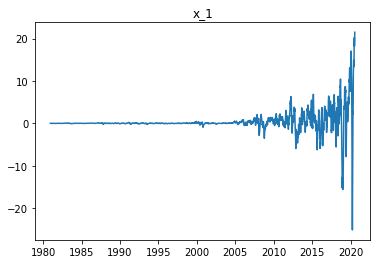

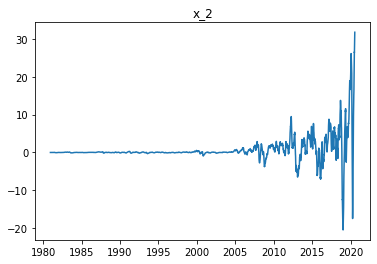

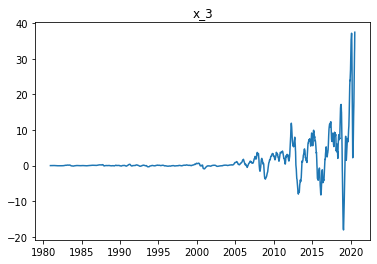

In [56]:
# Visualização da série
plt.plot(X[0])
plt.title('x_1')
plt.show()

# Visualização da série
plt.plot(X[1])
plt.title('x_2')
plt.show()

# Visualização da série
plt.plot(X[2])
plt.title('x_3')
plt.show()

***

## Determinação do $y_k$

In [57]:
# Lista que armazenará cada y_k
Y = []

# Calcula cada y_k
for k in range(len(X)):
    y_k = X[k] / data.rolling(63).std()
    Y.append(y_k)

In [58]:
# Quantidade de dados nulos
print('y_1:', Y[0].isna().sum())
print('y_2:', Y[1].isna().sum())
print('y_3:', Y[2].isna().sum())

y_1: 62
y_2: 62
y_3: 62


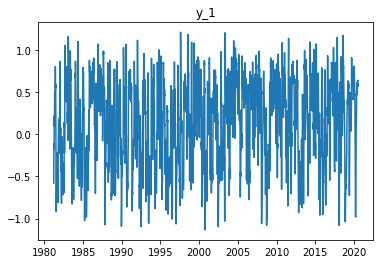

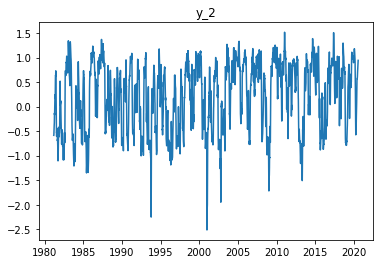

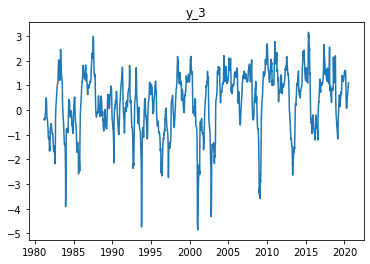

In [59]:
# Visualização da série
plt.plot(Y[0])
plt.title('y_1')
plt.show()

# Visualização da série
plt.plot(Y[1])
plt.title('y_2')
plt.show()

# Visualização da série
plt.plot(Y[2])
plt.title('y_3')
plt.show()

***

## Determinação do $z_k$

In [60]:
# Lista que armazenará cada z_k
Z = []

# Calcula cada z_k
for k in range(len(Y)):
    z_k = Y[k] / data.rolling(252).std()
    Z.append(z_k)

In [61]:
# Quantidade de dados nulos
print('z_1:', Z[0].isna().sum())
print('z_2:', Z[1].isna().sum())
print('z_3:', Z[2].isna().sum())

z_1: 251
z_2: 251
z_3: 251


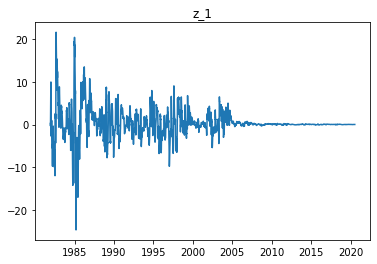

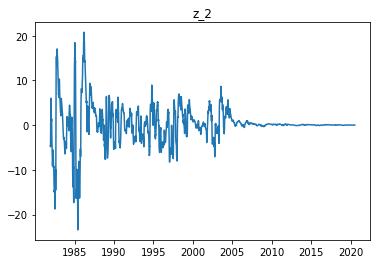

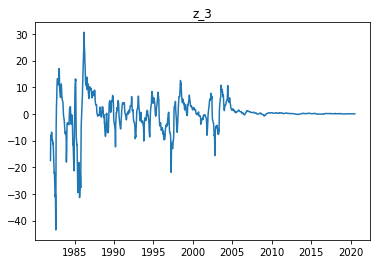

In [62]:
# Visualização da série
plt.plot(Z[0])
plt.title('z_1')
plt.show()

# Visualização da série
plt.plot(Z[1])
plt.title('z_2')
plt.show()

# Visualização da série
plt.plot(Z[2])
plt.title('z_3')
plt.show()

***

## Determinação do $u_k$

In [63]:
# Lista que armazenará cada u_k
U = []

# Calcula cada u_k
for k in range(len(Z)):
    u_k = R(Z[k])
    U.append(u_k)

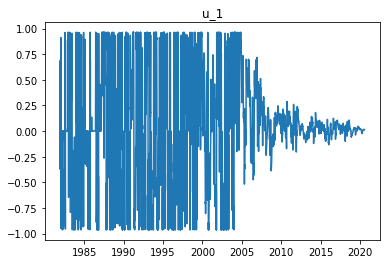

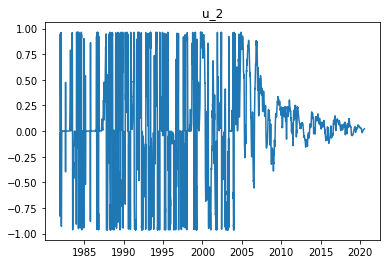

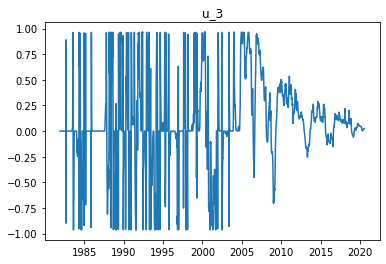

In [64]:
# Visualização da série
plt.plot(U[0])
plt.title('u_1')
plt.show()

# Visualização da série
plt.plot(U[1])
plt.title('u_2')
plt.show()

# Visualização da série
plt.plot(U[2])
plt.title('u_3')
plt.show()

***

## Sinal

In [65]:
# Variável que armazenará o sinal
signal = 0

# Calcula o sinal (soma ponderada com todos os pesos iguais a 1/3)
for k in range(len(U)):
    part = (1/3)*(U[k])
    signal += part

Text(0.5, 1.0, 'Sinal')

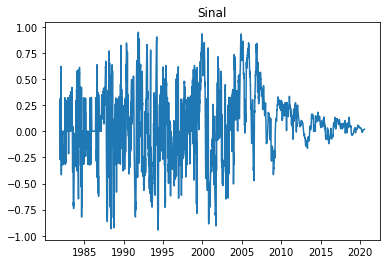

In [66]:
# Visualização da série
plt.plot(signal)
plt.title('Sinal')

***

## Código essencial

Abaixo, um recorte somente com o código necessário para download dos dados e implementação do algoritmo.

```python
import numpy as np
import pandas as pd
import yfinance as yf


# Funções apresentadas no paper: lambda, meia-vida e R
def lamb(n):
    return (n-1) / n

def HL(n):
    return np.log10(0.5) / np.log10(lamb(n))

def R(x):
    return (x * np.exp(-x**2/4)) / (0.89)


# Baixa a timeseries da AAPL
download = yf.download('AAPL')
# Escolhe os preços de fechamento para implementação do modelo
data = download['Close']

# Listas com valores de S_k e L_k dados no paper
S = [8., 16., 32.]
L = [24., 48., 96.]

# Listas que armazenarão as meias-vidas para cada valor anterior
S_half = []
L_half = []
# Calcula cada meia-vida
for k in range(len(S)):
    S_half.append(HL(S[k]))
    L_half.append(HL(L[k]))
    
# Lista que armazenará cada x_k
X = []
# Calcula cada x_k
for k in range(len(S_half)):
    x_k = data.ewm(S_half[k]).mean() - data.ewm(L_half[k]).mean()
    X.append(x_k)
    
# Lista que armazenará cada y_k
Y = []
# Calcula cada y_k
for k in range(len(X)):
    y_k = X[k] / data.rolling(63).std()
    Y.append(y_k)
    
# Lista que armazenará cada z_k
Z = []
# Calcula cada z_k
for k in range(len(Y)):
    z_k = Y[k] / data.rolling(252).std()
    Z.append(z_k)
    
# Lista que armazenará cada u_k
U = []
# Calcula cada u_k
for k in range(len(Z)):
    u_k = R(Z[k])
    U.append(u_k)
    
# Variável que armazenará o sinal
signal = 0
# Calcula o sinal (soma ponderada com todos os pesos iguais a 1/3)
for k in range(len(U)):
    part = (1/3)*(U[k])
    signal += part
```